In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#import required packages
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV


In [2]:
# Input the data from the csv
df = pd.read_csv('Walmart_data.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,weeknum
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.475524,26.000000
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.321797,14.511794
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.000000


In [4]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['new'] = df['Date'].dt.strftime('%Y%V')
df['weeknum'] = df['Date'].dt.isocalendar().week

In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,new,weeknum
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,201017,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,201048,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,201007,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,201008,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,201018,18


In [92]:
#EDA
store1_df = df[df['Store']==1]
store2_df = df[df['Store']==2]
store3_df = df[df['Store']==3]
store4_df = df[df['Store']==4]
store5_df = df[df['Store']==5]
store6_df = df[df['Store']==6]
store7_df = df[df['Store']==7]
store8_df = df[df['Store']==8]
type(store1_df)
store1_df.head()
store1_df.describe()




,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,weeknum
count,143.0,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1.0,1.555264e+06,0.069930,68.306783,3.219699,215.996892,7.610420,2010.965035,6.475524,26.000000
std,0.0,1.559808e+05,0.255926,14.250486,0.427313,4.350890,0.383749,0.799759,3.333213,14.561671
min,1.0,1.316899e+06,0.000000,35.400000,2.514000,210.337426,6.573000,2010.000000,1.000000,1.000000
25%,1.0,1.458105e+06,0.000000,58.265000,2.764500,211.549277,7.348000,2010.000000,4.000000,14.000000
50%,1.0,1.534850e+06,0.000000,69.640000,3.290000,215.459905,7.787000,2011.000000,6.000000,26.000000
75%,1.0,1.614892e+06,0.000000,80.485000,3.594000,220.531330,7.838000,2012.000000,9.000000,38.000000
max,1.0,2.387950e+06,1.000000,91.650000,3.907000,223.444251,8.106000,2012.000000,12.000000,52.000000


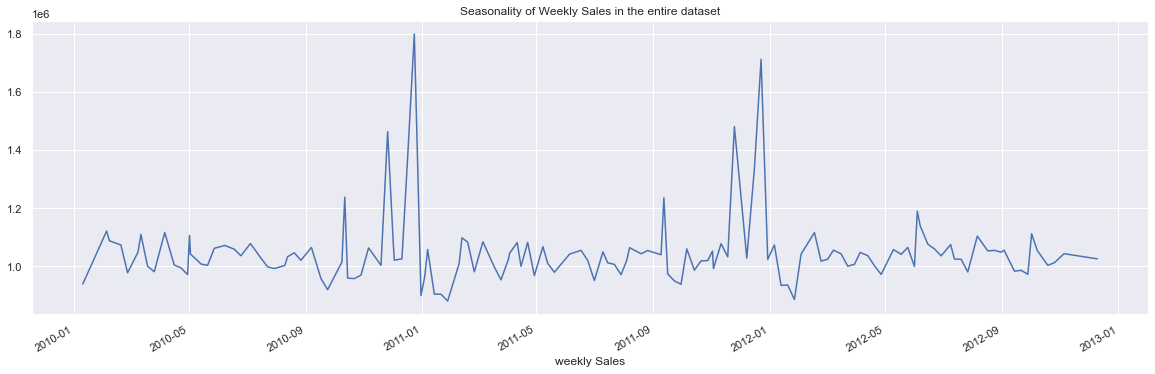

In [79]:
#Trying to gauge seasonality of weekly sales
df[['Date','Weekly_Sales']].groupby(['Date'])['Weekly_Sales'].agg('mean').plot(color='b')
plt.title('Seasonality of Weekly Sales in the entire dataset')
plt.xlabel('weekly Sales')
sns.set(rc={'figure.figsize':(20.0,6)})

We notice that the weekly sales are the highest during the winter holiday season.

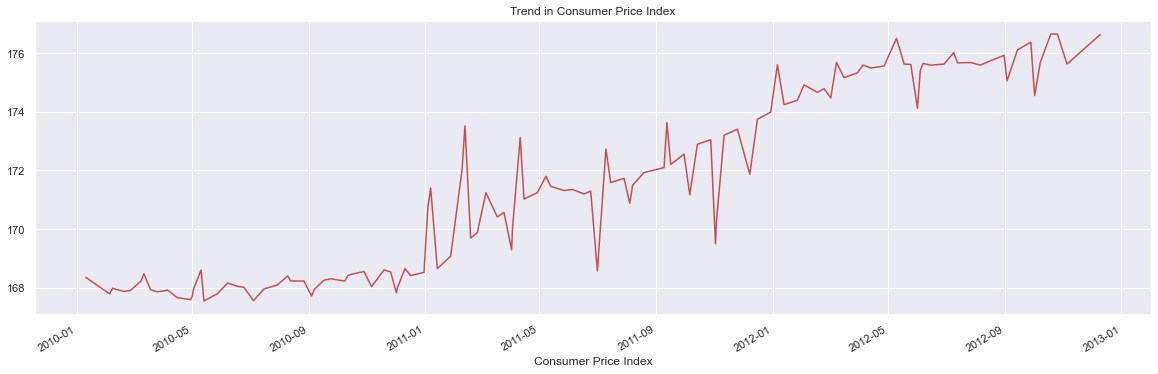

In [80]:
#Trying to gauge seasonality of weekly sales
df[['Date','CPI']].groupby(['Date'])['CPI'].agg('mean').plot(color='r')
plt.title('Trend in Consumer Price Index')
plt.xlabel('Consumer Price Index')
sns.set(rc={'figure.figsize':(20.0,6)})

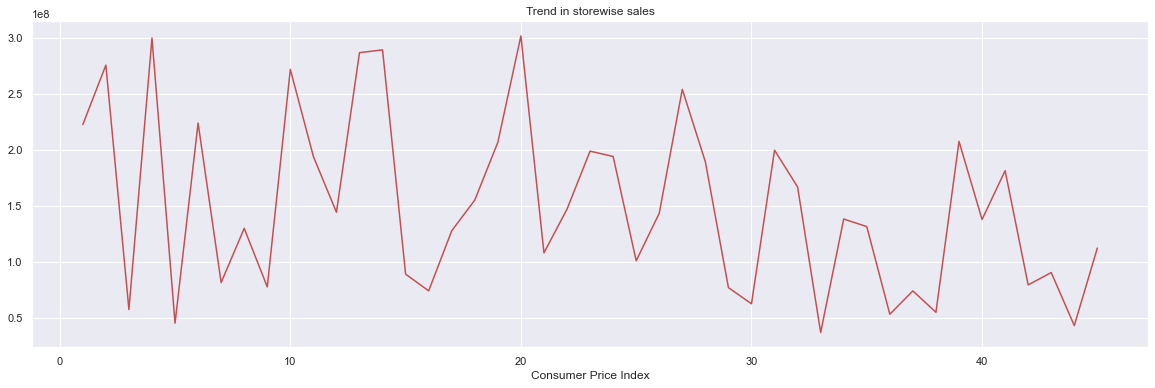

In [81]:
#Guaging the trends for 1st 5 stores

df[['Store','Weekly_Sales']].groupby(['Store'])['Weekly_Sales'].agg('sum').plot(color='r')
plt.title('Trend in storewise sales')
plt.xlabel('Consumer Price Index')
sns.set(rc={'figure.figsize':(20.0,6)})

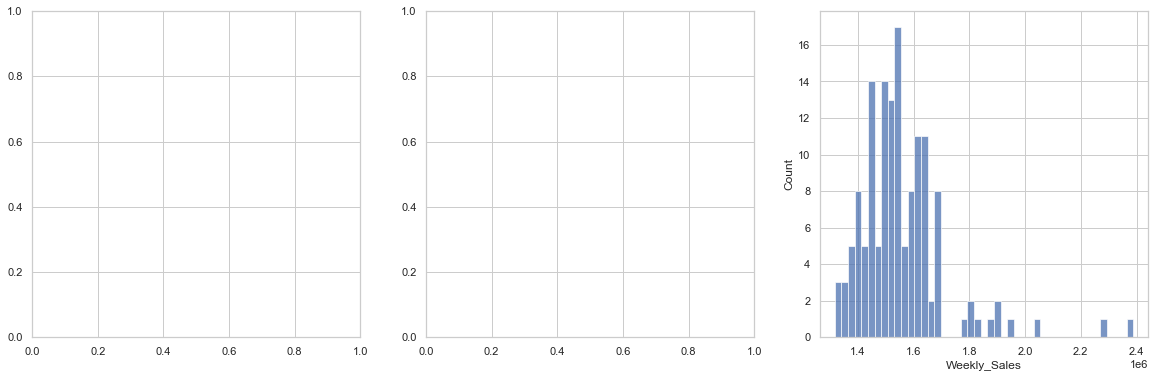

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# plot the reviews_per_month & number_of_reviews to see the distribution
f,(ax4, ax5, ax6) = plt.subplots(1,3, figsize=(20,6))

# plot the distribution of Airbnbs by neighbourhood group, neighbourhood & room_type
#ax4 = sns.histplot(df[df["Store"]==1], ax=ax4)
#ax5 = sns.distplot(store1_df.weeknum, ax=ax5)
ax6 = sns.histplot(store1_df.Weekly_Sales, bins=45, ax=ax6)

# show the plots
plt.show()

In [83]:
df['year'].head()

0    2010
1    2010
2    2010
3    2010
4    2010
Name: year, dtype: int64

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Count'>

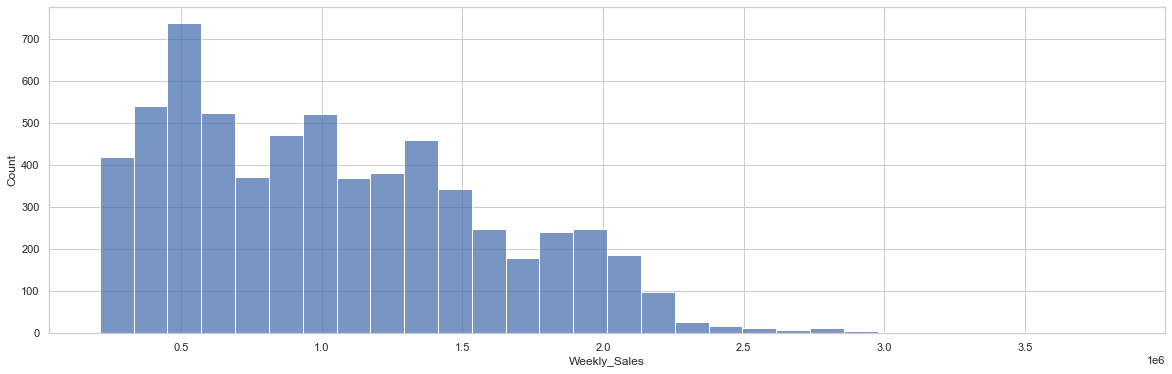

In [84]:

sns.histplot(data=df, x="Weekly_Sales",bins=30)

In [37]:
#sns.jointplot(data=df, x="Store", y="weeknum", hue="Weekly_Sales")

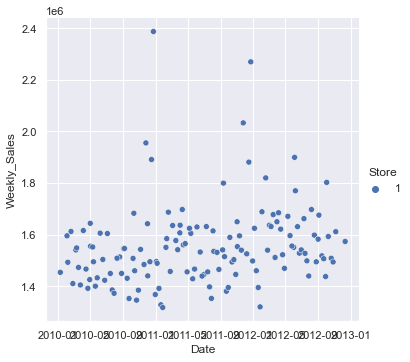

In [85]:
#train_df['sales_level'] = pd.cut(train_df["Weekly_sales"], [0, 100, 200, 12000], labels=["≤ 100", "100 - 200", "200+"])


sns.set(rc={'figure.figsize':(20.0,6)})
sns.relplot(
    data=store1_df,
    x="Date", y="Weekly_Sales", hue="Store"
)


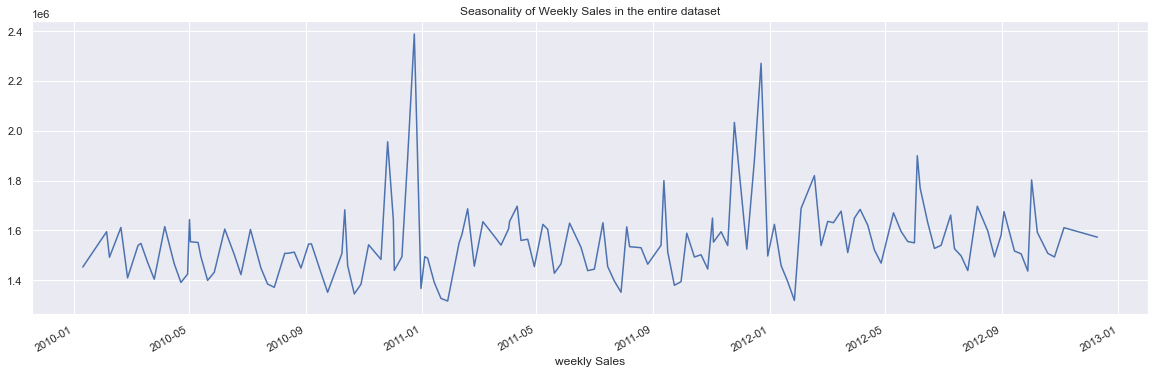

In [86]:
#Trying to gauge seasonality of weekly sales
store1_df[['Date','Weekly_Sales']].groupby(['Date'])['Weekly_Sales'].agg('mean').plot(color='b')
plt.title('Seasonality of Weekly Sales in the entire dataset')
plt.xlabel('weekly Sales')
sns.set(rc={'figure.figsize':(20.0,6)})

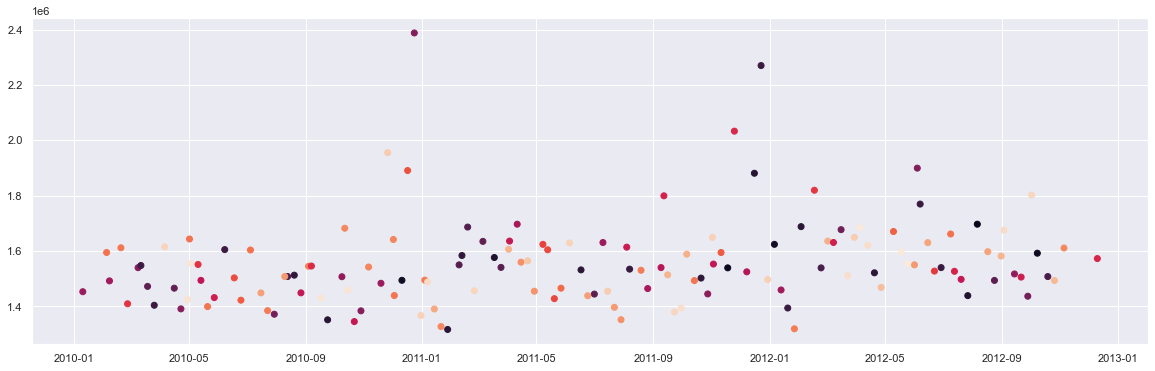

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 143
x = store1_df['Date']
y = store1_df['Weekly_Sales']
colors = np.random.rand(N)

plt.scatter(x, y, c=colors, alpha=1.0)
plt.show()

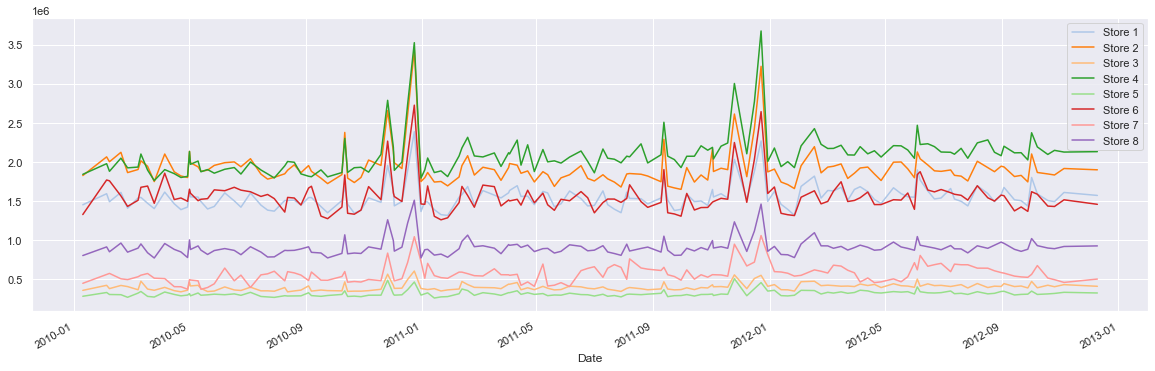

In [107]:
from matplotlib import pyplot as plt
from itertools import cycle, islice

my_colors = list(islice(cycle([
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5']), None, len(df)))

ax = store1_df.plot(x="Date", y="Weekly_Sales", kind="line",color = my_colors[1],label='Store 1')
store2_df.plot(x="Date", y="Weekly_Sales", kind="line",color = my_colors[2],ax = ax,label='Store 2')
store3_df.plot(x="Date", y="Weekly_Sales", kind="line",color = my_colors[3],ax = ax,label='Store 3')
store4_df.plot(x="Date", y="Weekly_Sales", kind="line",color = my_colors[4],ax = ax,label='Store 4')
store5_df.plot(x="Date", y="Weekly_Sales", kind="line",color = my_colors[5],ax = ax,label='Store 5')
store6_df.plot(x="Date", y="Weekly_Sales", kind="line",color = my_colors[6],ax = ax,label='Store 6')
store7_df.plot(x="Date", y="Weekly_Sales", kind="line",color = my_colors[7],ax = ax,label='Store 7')
store8_df.plot(x="Date", y="Weekly_Sales", kind="line",color = my_colors[8],ax = ax,label='Store 8')
plt.show()
#plt.plot(x_coordinates, y1_coordinates)
#plt.plot(x_coordinates, y2_coordinates)